In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('seaborn')


%config InlineBackend.figure_format = 'svg' 


from pylab import rcParams
rcParams['figure.figsize'] = 13, 8

import warnings
warnings.simplefilter('ignore')

In [2]:
train, test = pd.read_csv('train.csv'), pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.shape

(418, 11)

In [5]:
train.shape

(891, 12)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
train.dropna(subset=['Embarked'], inplace=True)
train.reset_index(drop=True, inplace=True)

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train['is_cabin_missed'] = train['Cabin'].isnull().astype('int64')
train.drop('Cabin', axis=1, inplace=True)

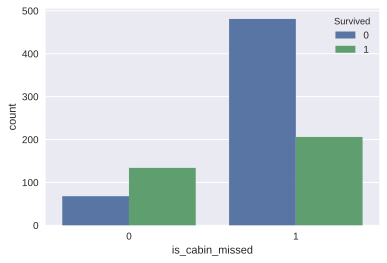

In [10]:
sns.countplot(x='is_cabin_missed',
             hue='Survived',
             data=train)

In [12]:
title_area = train['Name'].str.split(',')

In [13]:
titles = pd.Series([x[1].split('.')[0] for x in title_area]).str.strip()

In [14]:
title_count = titles.value_counts()
title_count

Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Lady              1
Jonkheer          1
Capt              1
Ms                1
Mme               1
Sir               1
Don               1
the Countess      1
dtype: int64

In [15]:
train['Title'] = titles
train.loc[train.Title.isin(title_count[title_count < 100].index), 'Title'] = 'Other'
train.drop('Name', axis=1, inplace=True)

In [16]:
train.Title.value_counts()

Mr       517
Miss     181
Mrs      124
Other     67
Name: Title, dtype: int64

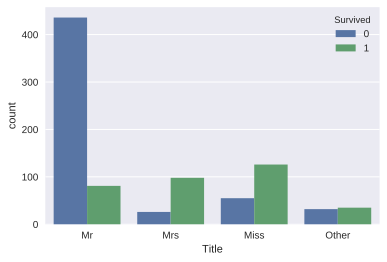

In [18]:
sns.countplot(x='Title', 
              hue='Survived',
              data=train)

In [19]:
is_age_missed = train['Age'].isnull()
train['is_age_missed'] = is_age_missed.astype('int64')

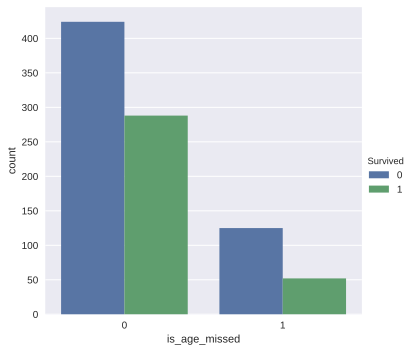

In [20]:
sns.factorplot(x='is_age_missed', 
               hue='Survived', 
               data=train, 
               kind='count', 
               size = 5)

In [22]:
X = train[['is_age_missed', 'Survived', 'PassengerId']].groupby(['is_age_missed', 'Survived'], as_index=False).count()
X

,is_age_missed,Survived,PassengerId
0,0,0,424
1,0,1,288
2,1,0,125
3,1,1,52


In [23]:
x = X.groupby('is_age_missed')['PassengerId'].transform('sum')
x

0    712
1    712
2    177
3    177
Name: PassengerId, dtype: int64

In [24]:
X['Frac'] = np.round(X.PassengerId.div(x), 5)
X

,is_age_missed,Survived,PassengerId,Frac
0,0,0,424,0.59551
1,0,1,288,0.40449
2,1,0,125,0.70621
3,1,1,52,0.29379


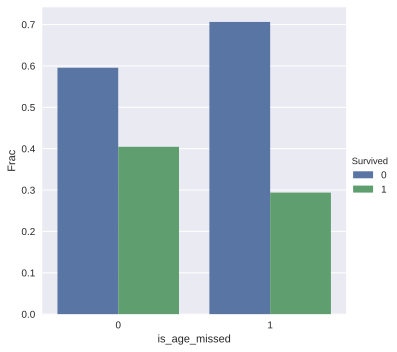

In [25]:
sns.factorplot(x='is_age_missed', 
               y='Frac',
               hue='Survived', 
               data=X, 
               kind='bar', 
               size = 5)

In [26]:

train.Age.fillna(0, inplace=True)

del X, x, is_age_missed


In [27]:
train['Ticket_number'] = [x[-1] for x in train.Ticket.str.split()]

In [28]:
train['Ticket_number'].str.isdigit().value_counts()

True     885
False      4
Name: Ticket_number, dtype: int64

In [29]:
train['Ticket'][~train['Ticket_number'].str.isdigit()]

178    LINE
270    LINE
301    LINE
596    LINE
Name: Ticket, dtype: object

In [30]:
train.loc[~train['Ticket_number'].str.isdigit(), 'Ticket_number'] = '0'
train['Ticket_number'] = train['Ticket_number'].astype('int64')
train.drop('Ticket', axis=1, inplace=True)

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
PassengerId        889 non-null int64
Survived           889 non-null int64
Pclass             889 non-null int64
Sex                889 non-null object
Age                889 non-null float64
SibSp              889 non-null int64
Parch              889 non-null int64
Fare               889 non-null float64
Embarked           889 non-null object
is_cabin_missed    889 non-null int64
Title              889 non-null object
is_age_missed      889 non-null int64
Ticket_number      889 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 90.4+ KB


In [32]:
train.drop('PassengerId', axis=1).describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,is_cabin_missed,is_age_missed,Ticket_number
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,8.890000e+02
mean,0.382452,2.311586,23.740349,0.524184,0.382452,32.096681,0.772778,0.199100,2.974018e+05
std,0.486260,0.834700,17.562609,1.103705,0.806761,49.697504,0.419273,0.399548,6.571193e+05
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,2.000000,6.000000,0.000000,0.000000,7.895800,1.000000,0.000000,1.431200e+04
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.120530e+05
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,3.470820e+05
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,3.101317e+06


In [33]:
train.drop('PassengerId', axis=1).describe(include=['object'])

,Sex,Embarked,Title
count,889,889,889
unique,2,3,4
top,male,S,Mr
freq,577,644,517


In [34]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [36]:
sex_enc = OrdinalEncoder()
sex_enc.fit(train[['Sex']])

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [37]:
sex_enc.categories_

[array(['female', 'male'], dtype=object)]

In [38]:
sex_bin = sex_enc.transform(train[['Sex']])
sex_bin[:10]

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.]])

In [39]:
ct = ColumnTransformer(
    [
        ('Pclass', OneHotEncoder(sparse=False, categories='auto'), ['Pclass']), 
        ('Embarked', OneHotEncoder(sparse=False), ['Embarked']), 
        ('Title', OneHotEncoder(sparse=False), ['Title'])
    ],
    remainder='drop'
)
ct.fit(train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('Pclass', OneHotEncoder(categorical_features=None, categories='auto',
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=False), ['Pclass']), ('Embarked', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float...pe=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=False), ['Title'])])

In [40]:
ct.get_feature_names()

['Pclass__x0_1',
 'Pclass__x0_2',
 'Pclass__x0_3',
 'Embarked__x0_C',
 'Embarked__x0_Q',
 'Embarked__x0_S',
 'Title__x0_Miss',
 'Title__x0_Mr',
 'Title__x0_Mrs',
 'Title__x0_Other']

In [41]:
X = pd.DataFrame(ct.transform(train),
                 columns=[x.replace('_x0', '') for x in ct.get_feature_names()])
X.head(10)

,Pclass__1,Pclass__2,Pclass__3,Embarked__C,Embarked__Q,Embarked__S,Title__Miss,Title__Mr,Title__Mrs,Title__Other
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
train.drop(['Sex', 'Pclass', 'Embarked', 'Title'], axis=1, inplace=True)

train['is_male'] = sex_bin

train = train.join(X)

train.head(10)

,PassengerId,Survived,Age,SibSp,Parch,Fare,is_cabin_missed,is_age_missed,Ticket_number,is_male,Pclass__1,Pclass__2,Pclass__3,Embarked__C,Embarked__Q,Embarked__S,Title__Miss,Title__Mr,Title__Mrs,Title__Other
0,1,0,22.0,1,0,7.2500,1,0,21171,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2,1,38.0,1,0,71.2833,0,0,17599,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,1,26.0,0,0,7.9250,1,0,3101282,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,4,1,35.0,1,0,53.1000,0,0,113803,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,5,0,35.0,0,0,8.0500,1,0,373450,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,6,0,0.0,0,0,8.4583,1,1,330877,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,7,0,54.0,0,0,51.8625,0,0,17463,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,8,0,2.0,3,1,21.0750,1,0,349909,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,9,1,27.0,0,2,11.1333,1,0,347742,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,10,1,14.0,1,0,30.0708,1,0,237736,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
np.shape(train)

(889, 20)

In [44]:
train.to_csv('titanic_train_mod.csv', index=False)

In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [46]:
test['Fare'].fillna(0, inplace=True)

In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [48]:
test['Age'].fillna(0, inplace=True)

In [49]:
test['is_cabin_missed'] = test['Cabin'].isnull().astype('int64')
test.drop('Cabin', axis=1, inplace=True)

In [50]:
title_area = test['Name'].str.split(',')

In [51]:
titles = pd.Series([x[1].split('.')[0] for x in title_area]).str.strip()

In [53]:
test['Title'] = titles
test.loc[test.Title.isin(title_count[title_count < 100].index), 'Title'] = 'Other'
test.drop('Name', axis=1, inplace=True)

In [54]:
is_age_missed = test['Age'].isnull()
test['is_age_missed'] = is_age_missed.astype('int64')

In [55]:
test['Ticket_number'] = [x[-1] for x in test.Ticket.str.split()]

In [56]:
test['Ticket_number'].str.isdigit().value_counts()

True    418
Name: Ticket_number, dtype: int64

In [57]:
test['Ticket'][~test['Ticket_number'].str.isdigit()]

Series([], Name: Ticket, dtype: object)

In [59]:
test.loc[~test['Ticket_number'].str.isdigit(), 'Ticket_number'] = '0'
test['Ticket_number'] = test['Ticket_number'].astype('int64')
test.drop('Ticket', axis=1, inplace=True)

In [60]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_cabin_missed,Title,is_age_missed,Ticket_number
0,892,3,male,34.5,0,0,7.8292,Q,1,Mr,0,330911
1,893,3,female,47.0,1,0,7.0000,S,1,Mrs,0,363272
2,894,2,male,62.0,0,0,9.6875,Q,1,Mr,0,240276
3,895,3,male,27.0,0,0,8.6625,S,1,Mr,0,315154
4,896,3,female,22.0,1,1,12.2875,S,1,Mrs,0,3101298


In [62]:
sex_enc = OrdinalEncoder()
sex_enc.fit(test[['Sex']])

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [63]:
sex_bin = sex_enc.transform(test[['Sex']])
sex_bin[:10]

array([[1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.]])

In [64]:
ct = ColumnTransformer(
    [
        ('Pclass', OneHotEncoder(sparse=False, categories='auto'), ['Pclass']), 
        ('Embarked', OneHotEncoder(sparse=False), ['Embarked']), 
        ('Title', OneHotEncoder(sparse=False), ['Title'])
    ],
    remainder='drop'
)
ct.fit(test)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('Pclass', OneHotEncoder(categorical_features=None, categories='auto',
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=False), ['Pclass']), ('Embarked', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float...pe=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=False), ['Title'])])

In [66]:
X = pd.DataFrame(ct.transform(test),
                 columns=[x.replace('_x0', '') for x in ct.get_feature_names()])
X.head(10)

,Pclass__1,Pclass__2,Pclass__3,Embarked__C,Embarked__Q,Embarked__S,Title__Dona,Title__Miss,Title__Mr,Title__Mrs,Title__Other
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [67]:
test.drop(['Sex', 'Pclass', 'Embarked', 'Title'], axis=1, inplace=True)

test['is_male'] = sex_bin

test = test.join(X)

test.head(10)

,PassengerId,Age,SibSp,Parch,Fare,is_cabin_missed,is_age_missed,Ticket_number,is_male,Pclass__1,Pclass__2,Pclass__3,Embarked__C,Embarked__Q,Embarked__S,Title__Dona,Title__Miss,Title__Mr,Title__Mrs,Title__Other
0,892,34.5,0,0,7.8292,1,0,330911,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,893,47.0,1,0,7.0000,1,0,363272,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,894,62.0,0,0,9.6875,1,0,240276,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,895,27.0,0,0,8.6625,1,0,315154,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,896,22.0,1,1,12.2875,1,0,3101298,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,897,14.0,0,0,9.2250,1,0,7538,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,898,30.0,0,0,7.6292,1,0,330972,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,899,26.0,1,1,29.0000,1,0,248738,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,900,18.0,0,0,7.2292,1,0,2657,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,901,21.0,2,0,24.1500,1,0,48871,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [68]:
np.shape(test)

(418, 20)

In [69]:
test.drop('Title__Dona', axis=1, inplace=True)

In [70]:
test.head()

,PassengerId,Age,SibSp,Parch,Fare,is_cabin_missed,is_age_missed,Ticket_number,is_male,Pclass__1,Pclass__2,Pclass__3,Embarked__C,Embarked__Q,Embarked__S,Title__Miss,Title__Mr,Title__Mrs,Title__Other
0,892,34.5,0,0,7.8292,1,0,330911,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,893,47.0,1,0,7.0000,1,0,363272,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,894,62.0,0,0,9.6875,1,0,240276,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,895,27.0,0,0,8.6625,1,0,315154,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,896,22.0,1,1,12.2875,1,0,3101298,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [72]:
test.shape

(418, 19)

In [75]:
train_set = train.drop('Survived', axis=1)
train_label = train['Survived']

In [76]:
import xgboost as xgb

In [77]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(train_set, train_label)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [78]:
preds = xgb_model.predict(test)

In [79]:
subs = pd.DataFrame()
subs['PassengerId'] = test['PassengerId']
subs['Survived'] = np.clip(preds, a_min=0, a_max=1)

In [81]:
subs.head(15)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [83]:
subs.to_csv('subs.csv', index=None)

In [108]:
param_grid = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]}

fit_params = {'eval_metric': 'mlogloss',
              'early_stopping_rounds': 10}

In [103]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [104]:
Y = train['Survived']
X = train.drop(['Survived', 'PassengerId'], axis=1)

In [112]:
rs_clf = RandomizedSearchCV(xgb_model, param_grid, n_iter=20,
                            n_jobs=1, verbose=2, cv=2,
                            scoring='neg_log_loss', refit=False, random_state=42)

In [113]:
rs_clf.fit(X, Y)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] subsample=0.7, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.2, gamma=1.0, colsample_bytree=0.9, colsample_bylevel=0.4 
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 4 pruned nodes, max_depth=1
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned no

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 8 pruned nodes, max_depth=8
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 2 pruned nodes, max_depth=7
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 12 pruned nodes, max_depth=8
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 2 pruned nodes, max_depth=13
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 2 pruned nodes, max_depth=11
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 4 pruned nodes, max_depth=7
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 6 pruned nodes, max_depth=10
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 2 pruned nodes, max_depth=6
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 4 pruned nodes, 

[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=4
[

[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=4
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=5
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=6
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=7
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=6
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=6
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_d

[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[20:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[

[CV]  subsample=0.8, silent=False, reg_lambda=100.0, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.1, gamma=0.5, colsample_bytree=1.0, colsample_bylevel=0.4, total=   0.0s
[CV] subsample=0.7, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=3, gamma=0, colsample_bytree=1.0, colsample_bylevel=1.0 
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=6
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 

[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=6
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=6
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=7
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=8
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=7
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=6
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=8
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=7
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_

[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[

[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=5
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=5
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_

[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 10 pruned nodes, max_depth=3
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 8 pruned nodes, max_depth=2
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 4 pruned nodes, max_depth=6
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 12 pruned nodes, max_depth=4
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 26 pruned nodes, max_depth=5
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 14 pruned nodes, max_depth=4
[20:22:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 8 pruned nodes, max_

[20:22:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[20:22:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 4 pruned nodes, max_depth=2
[20:22:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 4 pruned nodes, max_depth=1
[20:22:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[20:22:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 4 pruned nodes, max_depth=1
[20:22:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[20:22:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 4 pruned nodes, max_depth=1
[20:22:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[20:22:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    2.1s finished
/home/ilya/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=20, n_jobs=1,
          param_distributions={'silent': [False], 'max_depth': [6, 10, 15, 20], 'learning_rate': [0.001, 0.01, 0.1, 0.2, 0, 3], 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0], 'gamma': [0, 0.25, 0.5, 1.0], 'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0], 'n_estimators': [100]},
          pre_dispatch='2*n_

In [114]:
rs_clf.best_score_

-0.43878175835339905

In [115]:
rs_clf.best_params_

{'subsample': 1.0,
 'silent': False,
 'reg_lambda': 10.0,
 'n_estimators': 100,
 'min_child_weight': 7.0,
 'max_depth': 15,
 'learning_rate': 0.1,
 'gamma': 0.25,
 'colsample_bytree': 0.5,
 'colsample_bylevel': 1.0}

In [118]:
new_model = xgb.XGBClassifier(subsample=1, silent=False, reg_lambda=10, n_estimators=100, min_child_weight=7,
                              max_depth=15, learning_rate=0.1, gamma=0.25, colsample_bytree=0.5, colsample_bylevel=1)

In [119]:
%%time
new_model.fit(train_set, train_label)

[20:25:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[20:25:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[20:25:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[20:25:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=5
[20:25:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[20:25:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=5
[20:25:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[20:25:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=6
[20:25:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_d

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.25, learning_rate=0.1,
       max_delta_step=0, max_depth=15, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=10, scale_pos_weight=1, seed=None, silent=False,
       subsample=1)

In [121]:
preds = xgb_model.predict(test)
subs = pd.DataFrame()
subs['PassengerId'] = test['PassengerId']
subs['Survived'] = np.clip(preds, a_min=0, a_max=1)
subs.to_csv('subs.csv', index=None)

In [133]:
gbm_param_grid = {
    'n_estimators': range(1, 100),
    'max_depth': range(6, 30),
    'learning_rate': [.4, .45, .5, .55, .6],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
    'gamma': [0, 0.25, 0.5, 1.0],
    'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0]
}

In [134]:
gbm = xgb.XGBClassifier(n_estimators=10)

In [135]:
xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid, 
                                    estimator = gbm, scoring = "accuracy", 
                                    verbose = 1, n_iter = 50, cv = 4)

In [136]:
xgb_random.fit(train_set, train_label)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    5.1s finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=50, n_jobs=None,
          param_distributions={'n_estimators': range(1, 100), 'max_depth': range(6, 30), 'learning_rate': [0.4, 0.45, 0.5, 0.55, 0.6], 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0], 'gamma': [0, 0.25, 0.5, 1.0], 'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0]},
          pre_dispatch='2*n_jobs', random_

In [137]:
xgb_random.best_params_

{'subsample': 0.8,
 'reg_lambda': 10.0,
 'n_estimators': 19,
 'min_child_weight': 7.0,
 'max_depth': 26,
 'learning_rate': 0.55,
 'gamma': 0,
 'colsample_bytree': 0.6,
 'colsample_bylevel': 0.8}

In [138]:
model = xgb.XGBClassifier(n_estimators=19, max_depth=26, learning_rate=0.55, colsample_bytree=0.6, subsample=0.8,
                         reg_lambda=10.0, min_child_weight=7.0, gamma=0, colsample_bylevel=0.8 )

In [139]:
model.fit(train_set, train_label)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
       colsample_bytree=0.6, gamma=0, learning_rate=0.55, max_delta_step=0,
       max_depth=26, min_child_weight=7.0, missing=None, n_estimators=19,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [140]:
preds = model.predict(test)
subs = pd.DataFrame()
subs['PassengerId'] = test['PassengerId']
subs['Survived'] = np.clip(preds, a_min=0, a_max=1)
subs.to_csv('subs.csv', index=None)